<a href="https://colab.research.google.com/github/NyasaShaiju/Task3-Linear_Regression/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task3-Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/content/Housing.csv')

print(data.head())

print(data.isnull().sum())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

In [4]:
#Linear Regression
X = data[['area']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R-squared (R²): 0.27287851871974644


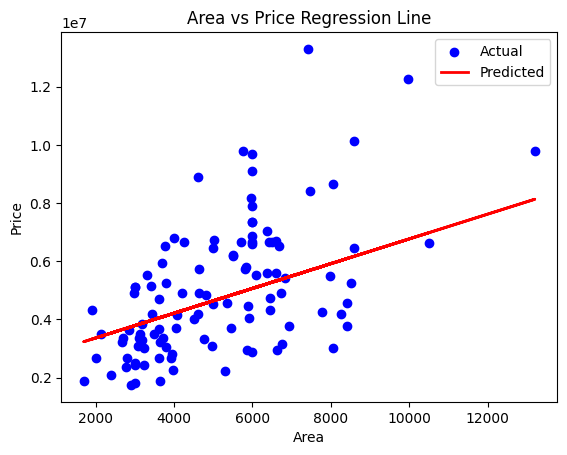

Coefficient (Slope): 425.72984193878284
Intercept: 2512254.2639593435


In [6]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price Regression Line')
plt.legend()
plt.show()

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


In [8]:
#Multiple Regression
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

print(f"Intercept: {model.intercept_}")


Mean Absolute Error (MAE): 1158970.4803166878
Mean Squared Error (MSE): 2457741642022.087
R-squared (R²): 0.513758534903707
     Feature   Coefficient
0       area  3.490097e+02
1   bedrooms  1.746851e+05
2  bathrooms  1.258151e+06
3    stories  4.838597e+05
Intercept: -64342.420905679464
